# Instagram Reach Analysis Using Python
_This is a notebook by Oluwaferanmi Alalade_

## Introduction
 Instagram is an American photo and video sharing social networking service founded in 2010 by Kevin Systrom and Mike Krieger, and later acquired by American company Facebook Inc., now known as Meta Platforms. The app allows users to upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow other users to add their content to a personal feed. Several business owners use Instagram to promote their business, and can see how well their posts are doing using the Insights section. This project is to help content creators and business owners make good use of the data collected from Instagram and how to improve the reach of their posts.

In the Insights section of each post of the Instgram Professional account, we have Impressions which could be:
 - From Home Page
 - From Profile
 - From Hashtags
 - From Explore
 - From Others
 - Number of saves
 - Number of likes
 - Number of comments
 - Number of shares
 - Profile visits
 - Follows
 - Impressions

The captions and hashtags of each post were added to give more insights.

## 1. Import Libraries
All the libraries needed for the completion of this project were imported

In [30]:
import pandas as pd #library for data analysis
import numpy as np #library to handle data in a vectorized form
import matplotlib.pyplot as plt #library for visualization
import plotly.express as px
import seaborn as sns
print("Done importing libraries!")

Done importing libraries!


## 2. Import Dataset
The data used in this project was collected manually from the Instagram accounts of three handmade footwear stores in Nigeria, namely Kuil Shoes, Smithbespokeshoes and D'noir Shoes.

In [13]:
df = pd.read_csv(r'C:\Users\Oluwaferanmi\Documents\demo.csv', encoding = 'latin1')
df.head()

,From Profile,From Home,From Hashtags,From Explore,From Other,Saves,Likes,Comments,Shares,Profile visits,Follows,Impressions,Captions,Hashtags
0,105,340,0,1,5,0,30,1,0,12,0,451,"Birkenstocks, DM to order",NaN
1,91,152,0,0,1,1,15,1,0,3,0,244,Give your feet the beauty treatment. Go faster...,NaN
2,98,230,0,2,0,0,18,0,0,5,0,330,Kuil_shoes gives the best finishing touch on a...,#shoes #fashion #dress
3,114,407,0,0,8,0,47,1,0,20,4,529,"Enjoy the comfortability! With Kuil_shoes, YOU...",#shoes #Kuil_shoes #fashion
4,118,620,0,2,1,1,111,2,0,21,0,743,"You might not have the intention, but with Kui...",NaN


## 3. Data Cleaning
The data imported above was processed fro analysis. The missing values were declared, I also sliced only the numerical columns and placed them in a new dataframe for further analysis. 

In [16]:
#Want to have an idea of the datatypes of each of the columns
df.dtypes

From Profile       int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Likes              int64
Comments           int64
Shares             int64
Profile visits     int64
Follows            int64
Impressions        int64
Captions          object
Hashtags          object
dtype: object

In [17]:
#To know how many missing values we have in each column
print(df.isnull().sum()) 

From Profile       0
From Home          0
From Hashtags      0
From Explore       0
From Other         0
Saves              0
Likes              0
Comments           0
Shares             0
Profile visits     0
Follows            0
Impressions        0
Captions           2
Hashtags          11
dtype: int64


The Caption and hashtag columns will be needed later from natural language processing

In [20]:
#Slicing only the numerical columns and placing into dataframe df_int
#so it can be explored
df_int = df.iloc[:,0:12]

In [22]:
df_int.head()

,From Profile,From Home,From Hashtags,From Explore,From Other,Saves,Likes,Comments,Shares,Profile visits,Follows,Impressions
0,105,340,0,1,5,0,30,1,0,12,0,451
1,91,152,0,0,1,1,15,1,0,3,0,244
2,98,230,0,2,0,0,18,0,0,5,0,330
3,114,407,0,0,8,0,47,1,0,20,4,529
4,118,620,0,2,1,1,111,2,0,21,0,743


### Checking for null values in the new dataframe
After I created the new dataframe containing only the numerical columns,
I checking the dataframe for missing values. They were no missing values.

In [25]:
print(df_int.isnull().sum()) #Show the number of missing vals in each col

From Profile      0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Likes             0
Comments          0
Shares            0
Profile visits    0
Follows           0
Impressions       0
dtype: int64


In [27]:
df.describe()

,From Profile,From Home,From Hashtags,From Explore,From Other,Saves,Likes,Comments,Shares,Profile visits,Follows,Impressions
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000
mean,68.000000,158.225806,4.290323,0.290323,7.419355,0.290323,21.096774,0.645161,0.064516,5.00000,0.322581,272.032258
std,26.234837,121.325103,7.479722,0.642575,24.448278,0.528744,19.794536,1.112007,0.249731,7.28011,0.908739,194.946400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.00000,0.000000,117.000000
25%,52.500000,92.000000,0.000000,0.000000,0.000000,0.000000,10.500000,0.000000,0.000000,1.00000,0.000000,172.000000
50%,62.000000,112.000000,0.000000,0.000000,2.000000,0.000000,14.000000,0.000000,0.000000,2.00000,0.000000,188.000000
75%,88.000000,175.000000,6.000000,0.000000,4.500000,0.500000,21.500000,1.000000,0.000000,5.50000,0.000000,293.500000
max,118.000000,620.000000,27.000000,2.000000,137.000000,2.000000,111.000000,5.000000,1.000000,31.00000,4.000000,1036.000000


## 4. Exploration of data
The data was explored to discover patterns
 - The distribution of Impressions from the Home page
 - The distribution of Impressions from profile
 - The distribution of Impressions from hashtags
 - The distribution of Impressions from Explore

#### The distribution of Impressions from the Home page

C:\Users\Oluwaferanmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


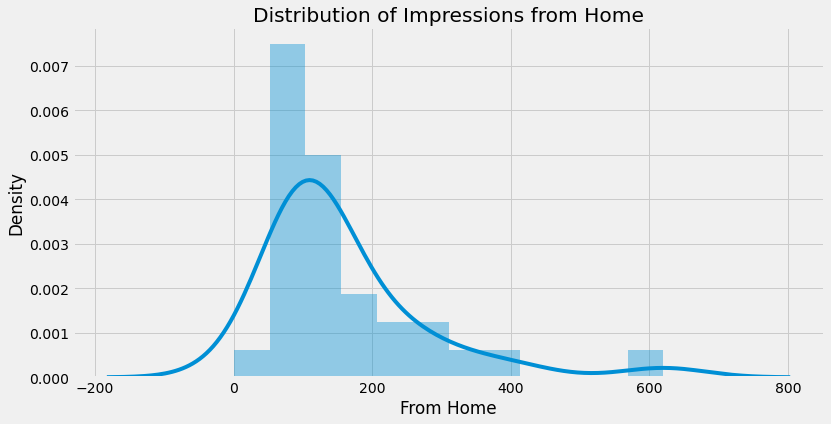

In [34]:
fig = plt.figure(figsize=(12,6)) #Create a new figure
ax = fig.add_subplot(1,1,1) #Add an axis to the figure
plt.style.use('fivethirtyeight') #Use the fivethirtyeight style from matplotlib
ax.set_title("Distribution of Impressions from Home")
sns.distplot(df_int["From Home"], ax = ax)

plt.show()